In [1]:
from src.functions import *

In [2]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

# Panel (a)

In [3]:
grid_searches = {}
delta_quantum_arrays = {}
delta_quantum_arrays_std = {}

for n in range(3,10):
    grid_searches[n] = load_from_json(f'data/grid_search_n{n}.json')
    gamma_range = grid_searches[n]['gamma_range']
    time_range = grid_searches[n]['time_range']
    T = grid_searches[n]['T']
    num_random_models = grid_searches[n]['num_random_models']
    delta_quantum_arrays[n] = np.mean(grid_searches[n]['delta'], axis=2)
    delta_quantum_arrays_std[n] = np.std(grid_searches[n]['delta'], axis=2, ddof=1) / np.sqrt(num_random_models)

In [4]:
len(grid_searches[9]['delta'])

96

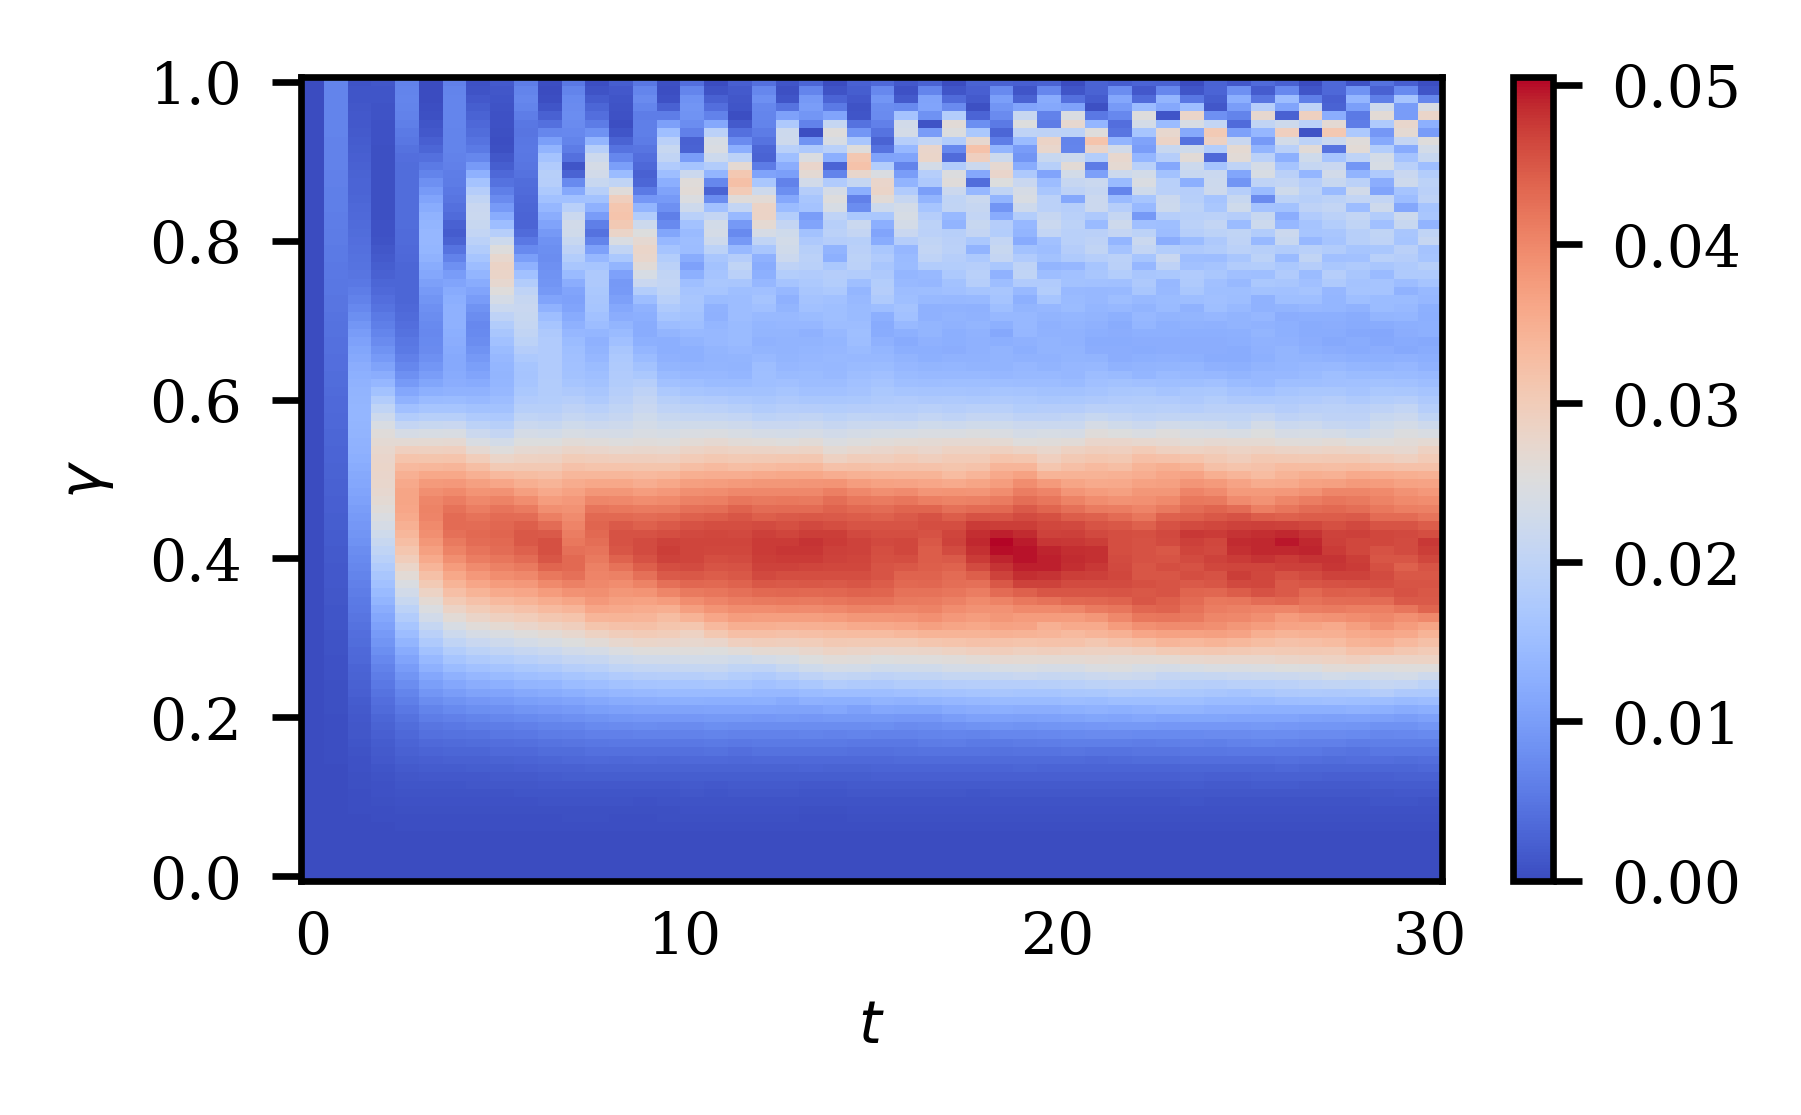

In [5]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

# Plot data on each subplot

pc = plt.pcolor(time_range, 
                gamma_range,
                delta_quantum_arrays[9], 
                cmap='coolwarm',
                vmin=0,
                vmax=np.max(delta_quantum_arrays[9])
                # vmax=0.065,
                )

fig.colorbar(pc)


# Set labels
plt.xlabel('$t$')
plt.ylabel('$\gamma$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Panel (b)

In [6]:
gamma_range[1] - gamma_range[0]

0.010526315789473684

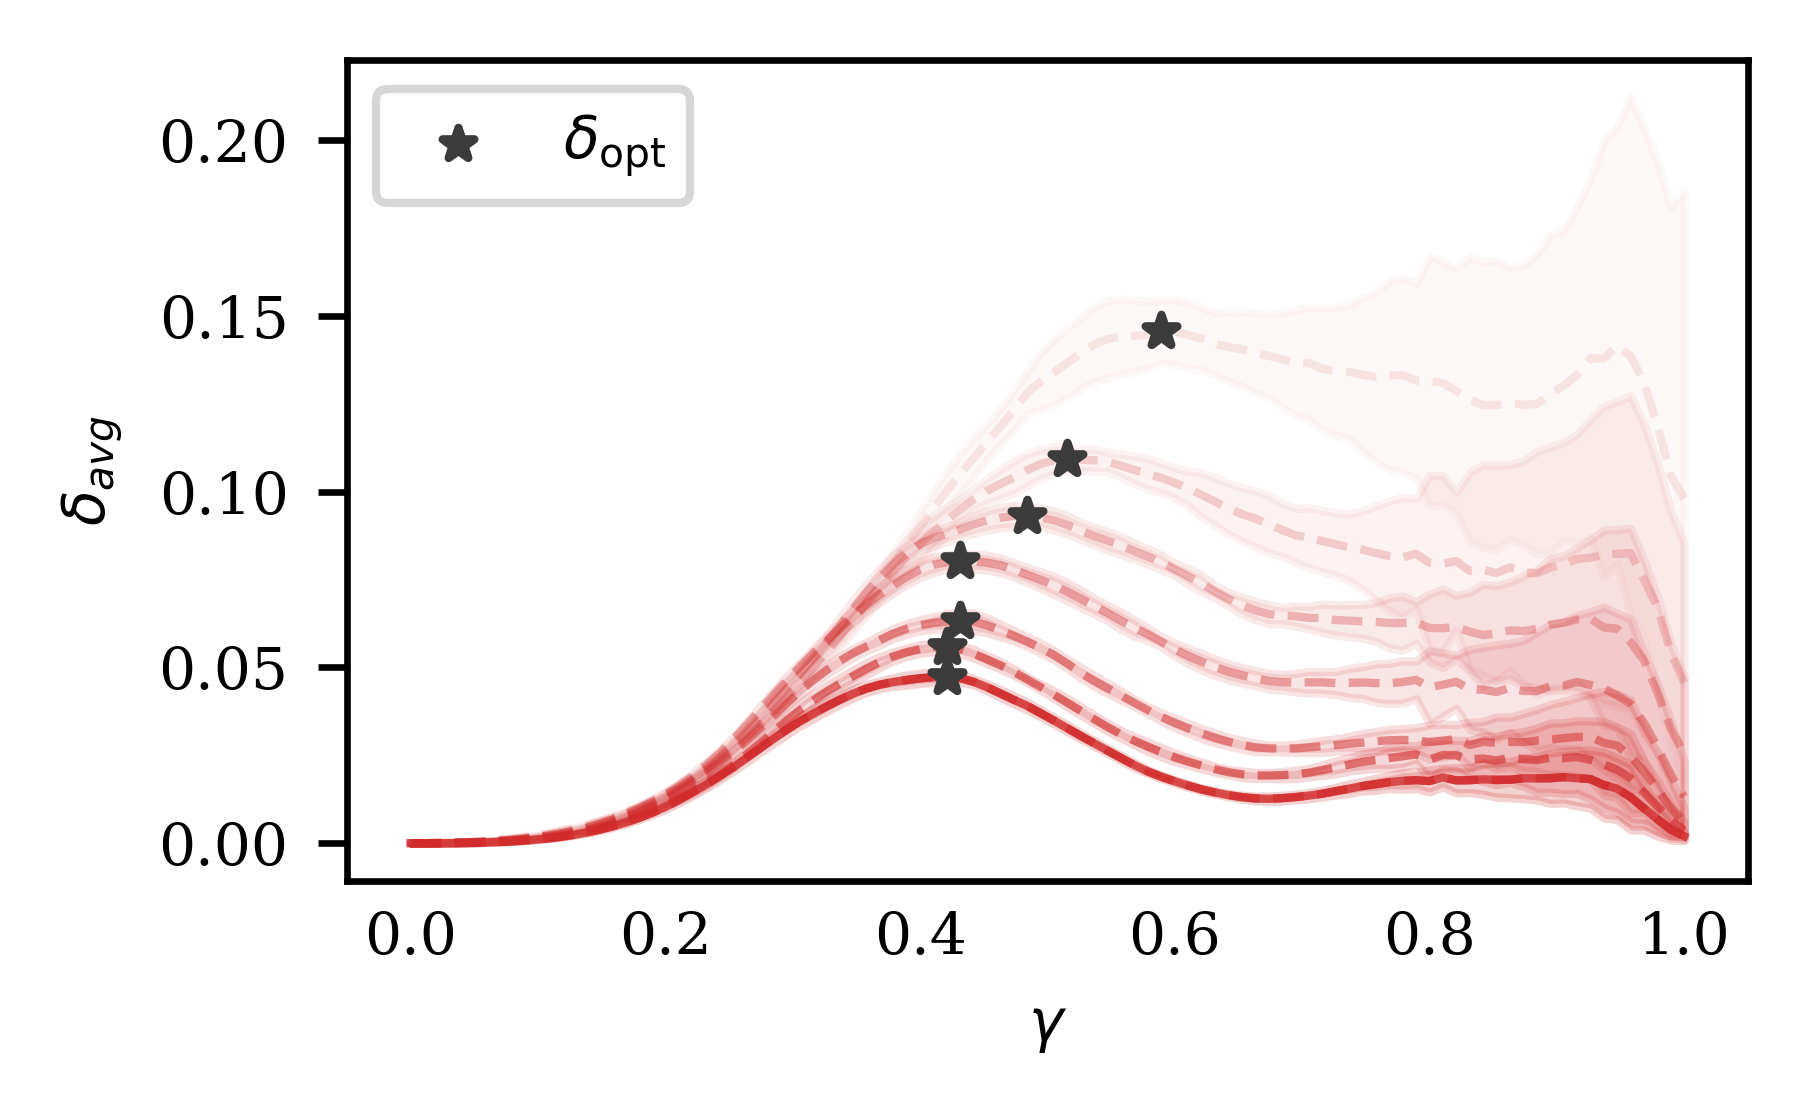

In [7]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/2))

# Initialize lists to store max delta values and their corresponding gamma values
max_delta_values = []
max_delta_gammas = []

for n in range(3,10):
        time_avg_delta_quantum = np.mean(delta_quantum_arrays[n][:, 20:50], axis=1)
        time_std_delta_quantum = np.std(delta_quantum_arrays[n][:, 20:50], axis=1, ddof=1)
    
        # Plot the time average delta quantum with fill
        plt.plot(gamma_range, 
                time_avg_delta_quantum,
                '--',
                color=colors["red"],  # You can adjust color as needed
                alpha=(0.2 + 0.1*(n-4)))

        plt.fill_between(gamma_range, 
                        time_avg_delta_quantum - time_std_delta_quantum,
                        time_avg_delta_quantum + time_std_delta_quantum,
                        color=colors["red"], 
                        alpha=(0.2 + 0.1*(n-4))*0.3)

        # Find the index and value of the maximum delta
        max_delta_index = np.argmax(time_avg_delta_quantum)
        max_delta_value = time_avg_delta_quantum[max_delta_index]
        max_delta_gamma = gamma_range[max_delta_index]

        # Store the max delta and gamma for plotting stars
        max_delta_values.append(max_delta_value)
        max_delta_gammas.append(max_delta_gamma)

# Plot the final n=9 value with a solid line
plt.plot(gamma_range, 
         np.mean(delta_quantum_arrays[9][:, 20:50], axis=1),
         '-',
         color=colors["red"],
         alpha=0.8)

# Plot the maximum delta values as stars on the graph
plt.scatter(max_delta_gammas, max_delta_values, color="#3b3b3b", marker='*', label='$\delta_{\mathrm{opt}}$', zorder=5)


# Set labels
plt.xlabel('$\gamma$')
plt.ylabel('$\delta_{avg}$')

# Add legend
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Panel (c)

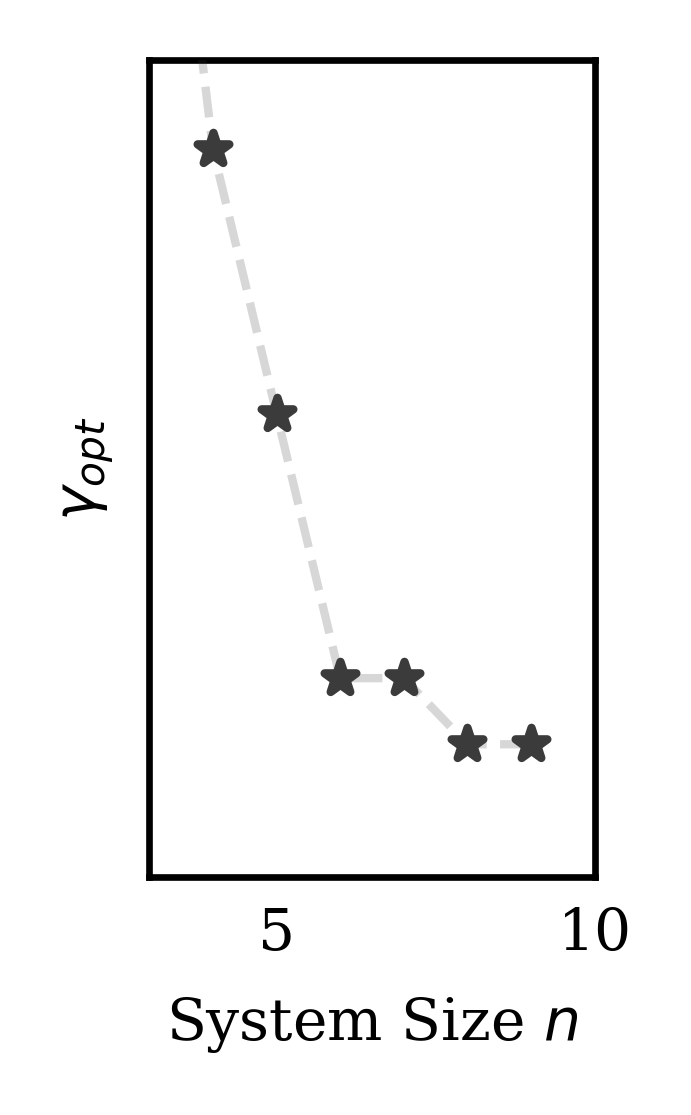

In [8]:
import matplotlib.pyplot as plt

# Initialize lists to store max delta values and their corresponding gamma values
max_delta_values = []
max_delta_gammas = []

# Figure for the optimal delta values as a function of system size n
fig_opt_delta = plt.figure(figsize=(figure_size_x / 5, figure_size_y / 2))

# Loop over system sizes (n) to find the optimal delta for each system size
for n in range(3, 10):
    # Calculate the time average and standard deviation for delta_quantum
    time_avg_delta_quantum = np.mean(delta_quantum_arrays[n][:, 10:50], axis=1)
    time_std_delta_quantum = np.std(delta_quantum_arrays[n][:, 10:50], axis=1, ddof=1)
    
    # Find the index and value of the maximum delta
    max_delta_index = np.argmax(time_avg_delta_quantum)
    max_delta_value = time_avg_delta_quantum[max_delta_index]
    max_delta_gamma = gamma_range[max_delta_index]

    # Store the max delta and gamma for plotting stars
    max_delta_values.append(max_delta_value)
    max_delta_gammas.append(max_delta_gamma)

# Plot the optimal delta values as stars as a function of system size n
plt.plot(range(3, 10), max_delta_gammas, '--', color="#3b3b3b", zorder=5, alpha=0.2)
plt.scatter(range(3, 10), max_delta_gammas, marker='*', color="#3b3b3b", label='$\gamma_{\mathrm{opt}}$', zorder=5)

plt.xlim(3,10)
plt.ylim(0.4, 0.53)

plt.yticks([])

# Set labels
plt.xlabel('System Size $n$')
plt.ylabel('$\gamma_{opt}$')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


# Combined panel

In [9]:
time_id_min = 18
time_id_max = 48

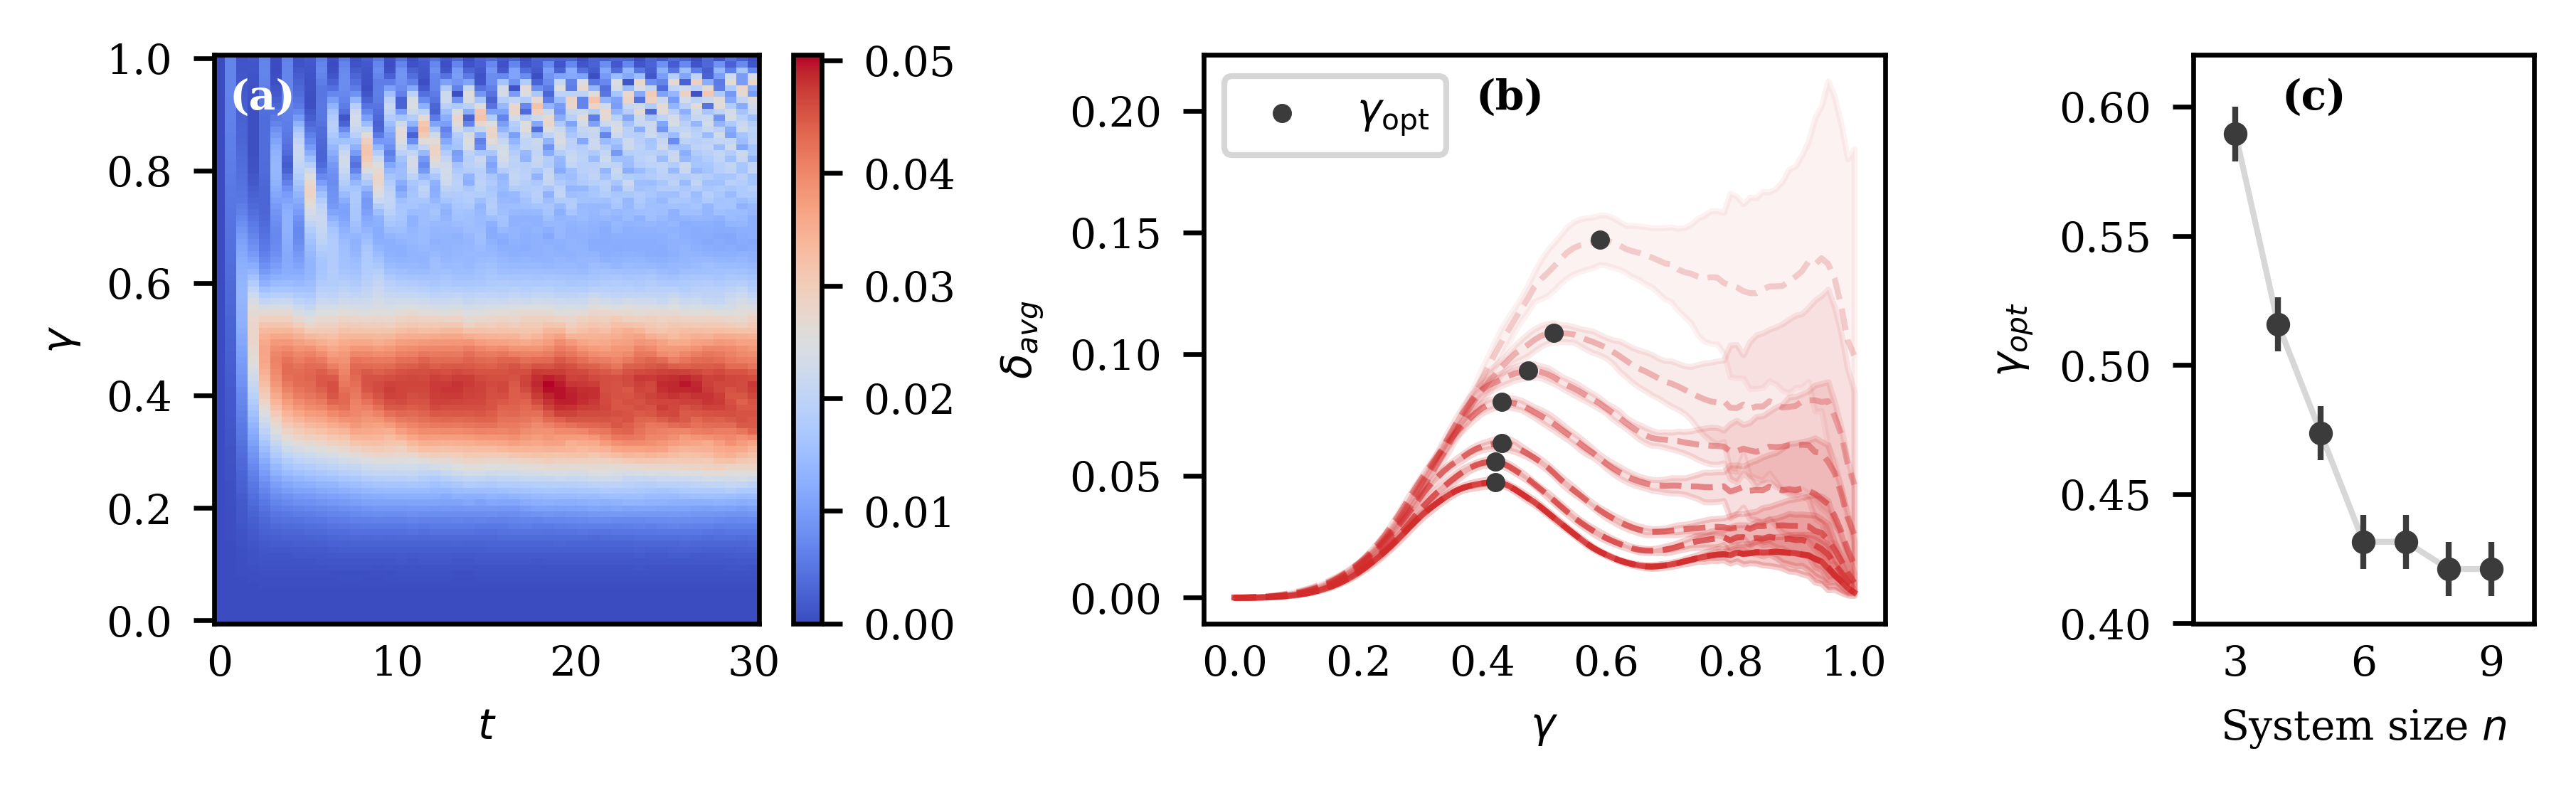

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define your variables like time_range, gamma_range, delta_quantum_arrays, colors, etc.

# Set figure size and grid for three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(figure_size_x, figure_size_y/2), gridspec_kw={'width_ratios': [2,2,1]})

# First Plot: Pcolor plot
pc = axs[0].pcolor(time_range, 
                   gamma_range,
                   delta_quantum_arrays[9], 
                   cmap='coolwarm',
                   vmin=0,
                   vmax=np.max(delta_quantum_arrays[9])
                   )
fig.colorbar(pc, ax=axs[0])
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$\gamma$')

# Add label (a)
axs[0].text(0.15, 0.96, '(a)', transform=axs[0].transAxes, fontsize=7, fontweight='bold', va='top', ha='right', color='white')

# Second Plot: Line plot with fill
max_delta_values = []
max_delta_gammas = []

for n in range(3,10):
    time_avg_delta_quantum = np.mean(delta_quantum_arrays[n][:, time_id_min:time_id_max], axis=1)
    time_std_delta_quantum = np.std(delta_quantum_arrays[n][:, time_id_min:time_id_max], axis=1, ddof=1)

    axs[1].plot(gamma_range, 
                time_avg_delta_quantum,
                '--',
                color=colors["red"],
                alpha=(0.2 + 0.1*(n-3)))

    axs[1].fill_between(gamma_range, 
                        time_avg_delta_quantum - time_std_delta_quantum,
                        time_avg_delta_quantum + time_std_delta_quantum,
                        color=colors["red"], 
                        alpha=(0.2 + 0.1*(n-3)) * 0.3)

    max_delta_index = np.argmax(time_avg_delta_quantum)
    max_delta_value = time_avg_delta_quantum[max_delta_index]
    max_delta_gamma = gamma_range[max_delta_index]

    max_delta_values.append(max_delta_value)
    max_delta_gammas.append(max_delta_gamma)

# Final n=9 line
axs[1].plot(gamma_range, 
            np.mean(delta_quantum_arrays[9][:, time_id_min:47], axis=1),
            '-',
            color=colors["red"],
            alpha=0.8)

# Stars for max values
axs[1].scatter(max_delta_gammas, max_delta_values, color="#3b3b3b", s=5, marker='o', label='$\gamma_{\mathrm{opt}}$', zorder=5)

# Set labels
axs[1].set_xlabel('$\gamma$')
axs[1].set_ylabel('$\delta_{avg}$')
axs[1].set_xticks([0,0.2,0.4,0.6,0.8,1])
axs[1].legend()

# Add label (b)
axs[1].text(0.5, 0.96, '(b)', transform=axs[1].transAxes, fontsize=7, fontweight='bold', va='top', ha='right')

# Third Plot: Optimal delta as a function of system size
max_delta_values = []
max_delta_gammas = []

for n in range(3, 10):
    time_avg_delta_quantum = np.mean(delta_quantum_arrays[n][:, time_id_min:time_id_max], axis=1)
    max_delta_index = np.argmax(time_avg_delta_quantum)
    max_delta_gamma = gamma_range[max_delta_index]
    max_delta_gammas.append(max_delta_gamma)

gamma_step = gamma_range[1] - gamma_range[0]

axs[2].plot(range(3, 10), max_delta_gammas, '-', color="#3b3b3b", zorder=5, alpha=0.2)
axs[2].errorbar(range(3, 10), max_delta_gammas, gamma_step, fmt='o', ms=3, color="#3b3b3b", label='$\gamma_{\mathrm{opt}}$', zorder=5)

axs[2].set_xlim(2, 10)
axs[2].set_ylim(0.4, 0.62)
axs[2].set_xticks([3,6,9])

# Set labels
axs[2].set_xlabel('System size $n$')
axs[2].set_ylabel('$\gamma_{opt}$')

# Add label (c)
axs[2].text(0.45, 0.96, '(c)', transform=axs[2].transAxes, fontsize=7, fontweight='bold', va='top', ha='right')

# Adjust layout for all subplots
plt.tight_layout()
plt.show()

fig.savefig(projectdir+f'figures/grid_search_panel')
fig.savefig(projectdir+f'figures/pdf_figures/grid_search_panel.pdf')

In [11]:
# Save optimal gammas
optimal_gammas = {}
for n_id, n in enumerate(range(3,10)):
    optimal_gammas[f'{n}'] = np.round(max_delta_gammas[n_id], 5)

save_in_json(optimal_gammas, 'optimal_gammas.json')